# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)  
## Shu Yoko
### Aug 9

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

### Week 1 

For this week, you will required to submit the following:

A description of the problem and a discussion of the background. (15 marks)
A description of the data and how it will be used to solve the problem. (15 marks)

## 1. Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

In my project, I will run the hypothesis test about the **hotelling's law** to see if it's actually decent economical strategies. 

Hotelling Law is that: 
*Suppose there are two competing shops located along the length of a street running north and south, with customers spread equally along the street. Both shop owners want their shops to be where they will get most market share of customers. If both shops sell the same range of goods at the same prices then the locations of the shops are themselves the 'products'. Each customer will always choose the nearer shop as it is disadvantageous to travel to the farther. - Wikipedia*. 
[For more discription](https://en.wikipedia.org/wiki/Hotelling's_law)

Basically, this theory argues that if the shops offer the similar products, the shop with most dominant area will win. Here is some figure that explain. Let's say there are two stores A and B. If they decided to open their shop in a linear city that has 12 dashes of land.  

|------|------|   

First, they build the shop as they can share same amount of customer. They both win ------ (6 dashes) of the area/customers that are coming from.    
|---A---|---B---|   

But if B moves 2 dashes closer to shop A.  

|---A--**-|-B-----**|   

Shop B wins some of A's customers since they sell similar products and customer choose to go to the closer shop. A loses some of its customers.  

So A decided to move towards shop B, so A can win some customers too.  

|------A|B------|  

Here, both shops end up with locating at the center.  

Likewise, this theory argues that if the shop was located away from the center, they will loose the competition.  
|--A--**--|-B-----**|  

In this project, I will test if this theory is correct at the city in Manhattan.  
The reason why I chose Manhattan for this project is that Manhattan is a island like shape and is isolated from other land. So I thought that it is easy to calculate the center of the Manhattan.  

## 2. Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

I will use Forsquare data in Manhattan. For all pizza restaurants (stc) in Manhattan with similar rate and similar price, I will see if the pizza restaurants in the near the center of Manhattan has more reviews (# of customers).     

In [606]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


#pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


import math
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


#! pip install folium==0.5.0
import folium # plotting library
import time
import tqdm
from tqdm.notebook import trange, tqdm
from time import sleep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols


print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [1]:
CLIENT_ID = '****' # your Foursquare ID
CLIENT_SECRET = '****' # your Foursquare Secret
ACCESS_TOKEN = '****' # your FourSquare Access Token
VERSION = '****'
LIMIT = 500
print('Your credentails:')

Your credentails:


In [417]:
# radius: 2210
addresses_1 = ['Broadway E Houston St', '7th Ave & W 51st St, New York City', '40.79326,-73.95746']
# radius 1180
addresses_2 = ['40.819187, -73.946999']
# radius 640. 
addresses_3 = ['Broadway W 162nd st, New York', 'Broadway W 178th St, New York', '40.85877,-73.93012', 'Broadway W 207th st']
rad_1 = 2210
rad_2 = 1180
rad_3 = 640

In [418]:
for n in addresses_2:
    address = n
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

40.8192933 -73.94666146798247


In [419]:
venues = []
for n in addresses_1:
    address = n
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = 'Pizza'
    radius = rad_1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venue = results['response']['venues']
    venues.append(venue)

for n in addresses_2:
    address = n
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = 'Pizza'
    radius = rad_2
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venue = results['response']['venues']
    venues.append(venue)
    
for n in addresses_3:
    address = n
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = 'Pizza'
    radius = rad_3
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venue = results['response']['venues']
    venues.append(venue)



In [539]:
kk = pd.DataFrame()
for i in venues:
    neighborhood_data = pd.json_normalize(i)
    kk = pd.concat([neighborhood_data, kk])

id                        name  \
0   4ab97430f964a520727f20e3  Grandpa's Brick Oven Pizza   
1   4c3b4de31a1cd13af120b60d  Tony's Pizza, Pasta & Gyro   
2   4d77b1c378d5a093829c8372                 Pizza Haven   
3   4eaae8ff82312ec2f6b379a9                Pizza buffet   
4   5053b972e4b04df233bdabdf                 Pizza Night   
..                       ...                         ...   
45  480d1979f964a520264f1fe3              The Pizza Shop   
46  539a786e498efdb7bfa6fe39             99¢ Fresh Pizza   
47  51351c3fe4b0c58b63965114                 Joe's Pizza   
48  4c5b0941b05c1b8dffb9d9b1              Domino's Pizza   
49  4b9988caf964a520528135e3               14th St Pizza   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409593    False   
1   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409593    False   
2   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409593    False   
3   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409593    False   
4   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409593    False   
..                                                ...           ...      ...   
45  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
46  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
47  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
48  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
49  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   

   location.address location.crossStreet  location.lat  location.lng  \
0     4973 Broadway         Isham Street     40.868215    -73.919419   
1     4771 Broadway          Dyckman St.     40.865608    -73.926851   
2     4942 Broadway             207th St     40.867700    -73.920812   
3               NaN                  NaN     40.866776    -73.920807   
4               NaN                  NaN     40.867998    -73.926105   
..              ...                  ...           ...           ...   
45     110 Avenue A      btw 6th and 7th     40.726021    -73.983103   
46              NaN                  NaN     40.730987    -73.989422   
47    150 E 14th St           at 3rd Ave     40.733234    -73.987672   
48    181 Church St             Duane St     40.715625    -74.007131   
49    226 E 14th St     btw 2nd & 3rd Av     40.732892    -73.986208   

                              location.labeledLatLngs  ...  location.country  \
0   [{'label': 'display', 'lat': 40.86821549098444...  ...     United States   
1   [{'label': 'display', 'lat': 40.86560754204715...  ...     United States   
2   [{'label': 'display', 'lat': 40.86770033238289...  ...     United States   
3   [{'label': 'display', 'lat': 40.86677551269531...  ...     United States   
4   [{'label': 'display', 'lat': 40.867998, 'lng':...  ...     United States   
..                                                ...  ...               ...   
45                                                NaN  ...     United States   
46  [{'label': 'display', 'lat': 40.73098727274592...  ...     United States   
47  [{'label': 'display', 'lat': 40.73323370786353...  ...     United States   
48  [{'label': 'display', 'lat': 40.71562501338636...  ...     United States   
49  [{'label': 'display', 'lat': 40.73289173110826...  ...     United States   

                            location.formattedAddress delivery.id  \
0   [4973 Broadway (Isham Street), New York, NY 10...         NaN   
1   [4771 Broadway (Dyckman St.), New York, NY 10034]         NaN   
2      [4942 Broadway (207th St), New York, NY 10034]       25779   
3                                                 NaN         NaN   
4                                [New York, NY 10034]         NaN   
..                                                ...         ...   
45  [110 Avenue A (btw 6th and 7th)

In [540]:
neighborhoods_data = kk.reset_index(drop=True)

In [541]:
# create map of New York using latitude and longitude values

map_trnt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(neighborhoods_data['location.lat'], neighborhoods_data['location.lng']):
    label = '{}'.format(neighborhoods_data)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_trnt)  
map_trnt

In [708]:
neighborhoods_data

id                                           name  \
0   4b4e0ed5f964a520f5df26e3                                     Citi Pizza   
1   4e4c4f83bd413c4cc6686817                            B & T Supreme Pizza   
2   4b7adff3f964a520d9422fe3                      Francesca's Pizza & Pasta   
3   4a356c9ef964a520f99c1fe3                                   La Mia Pizza   
4   4d8f724ed00a6ea88c56cf4f                             Dreamer's Pizza II   
..                       ...                                            ...   
84  4a89cd2ff964a520100920e3                                  2 Bros. Pizza   
85  4800619cf964a520ec4e1fe3                      Artichoke Basille’s Pizza   
86  4d31bb1f98336dcbd7631bf0  Scott's Pizza Tours - NYC Pizza Walk/Bus Tour   
87  53370455498e18d7e6607a1d                            La Pizza & La Pasta   
88  56988a98498e99afdac6ba6c                                      99¢ Pizza   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409588    False   
1   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409588    False   
2   [{'id': '4bf58dd8d48988d110941735', 'name': 'I...  v-1629409588    False   
3   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409588    False   
4   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409588    False   
..                                                ...           ...      ...   
84  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
85  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   
86  [{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...  v-1629409585    False   
87  [{'id': '4bf58dd8d48988d110941735', 'name': 'I...  v-1629409585    False   
88  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1629409585    False   

     location.address  location.crossStreet  location.lat  location.lng  \
0      179 E 115th St                   NaN     40.797661    -73.940926   
1       132 E 86th St                   NaN     40.779324    -73.955927   
2        1811 1st Ave               94th St     40.781815    -73.945883   
3        1580 1st Ave  btwn 77th & 78th St.     40.774436    -73.950906   
4        1760 1st Ave               91st St     40.780128    -73.946587   
..                ...                   ...           ...           ...   
84  32 Saint Marks Pl    btwn 2nd & 3rd Ave     40.728905    -73.988324   
85      321 E 14th St    btwn 1st & 2nd Ave     40.732028    -73.983921   
86                NaN                   NaN     40.722063    -73.996536   
87        200 5th Ave          at W 23rd St     40.742449    -73.989983   
88        87 Avenue A                   NaN     40.725350    -73.984080   

                              location.labeledLatLngs  ...  location.country  \
0   [{'label': 'display', 'lat': 40.79766082763672...  ...     United States   
1   [{'label': 'display', 'lat': 40.779324, 'lng':...  ...     United States   
2   [{'label': 'display', 'lat': 40.78181524777471...  ...     United States   
3   [{'label': 'entrance', 'lat': 40.774392, 'lng'...  ...     United States   
4   [{'label': 'display', 'lat': 40.78012847900390...  ...     United States   
..                                                ...  ...               ...   
84  [{'label': 'display', 'lat': 40.72890524132338...  ...     United States   
85  [{'label': 'display', 'lat': 40.732028, 'lng':...  ...     United States   
86  [{'label': 'display', 'lat': 40.72206313067683...  ...     United States   
87  [{'label': 'display', 'lat': 40.74244920189739...  ...     United States   
88  [{'label': 'display', 'lat': 40.72535016277604...  ...     United States   

                            location.formattedAddress delivery.id  \
0                [179 E 115th St, New York, NY 10029]         NaN   
1                 [132 E 86th St, New York, NY 10028]         NaN   
2        [1811 1st Ave (94th St), New York, NY 

Get detailes of Vebues

In [542]:
neighborhoods_data = neighborhoods_data[151:240].reset_index(drop=True)

In [648]:
df151_200 = []

for n in trange(len(neighborhoods_data)):
    id = neighborhoods_data['id'][n]
    url =  "https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}".format(id,CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venue = results['response']['venue']
    df151_200.append(venue)
    time.sleep(5)

  0%|          | 0/89 [00:00<?, ?it/s]

KeyError: 'venue'

In [476]:
df1_50
df51_100
df101_150


kk = pd.DataFrame()
for i in venues:
    neighborhood_data = pd.json_normalize(i)
    kk = pd.concat([neighborhood_data, kk])
    
neighborhoods_data = kk.reset_index(drop=True)

In [684]:
df1_200 = df1_50 + df51_100 + df101_150

In [685]:
len(df1_200)

150

In [686]:
shops = pd.DataFrame()

for i in df1_200:
    shop_data = pd.json_normalize(i)
    shops = pd.concat([shop_data, shops])

<AxesSubplot:ylabel='Frequency'>

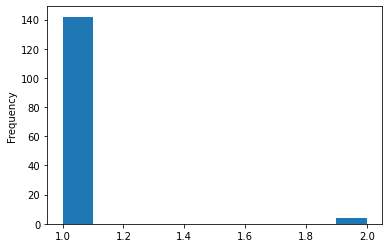

In [687]:
shops['id'].value_counts().plot.hist()

In [688]:
# shops = shops[['id','name','like', 'dislike', 'rating', 'likes.count', 'tips.count']]

In [689]:
print('Mean Rating:')
shops['rating'].mean()

Mean Rating:


6.925581395348839

<AxesSubplot:ylabel='Frequency'>

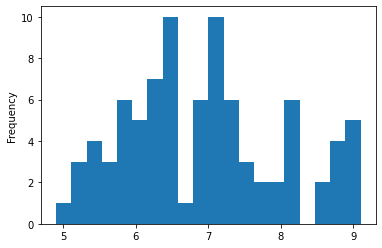

In [690]:
shops['rating'].plot.hist(bins=20)
# Get shops between 6 to 8

In [691]:
shops_68 = shops[shops['rating'].between(6,8)]

<AxesSubplot:ylabel='Frequency'>

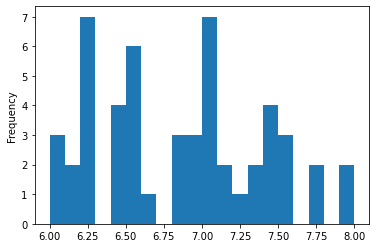

In [692]:
shops_68['rating'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

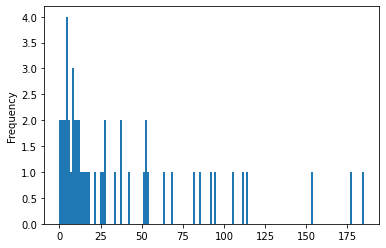

In [693]:
shops_68['likes.count'].plot.hist(bins=150)

In [694]:
shops_68[shops_68['likes.count']==0]

id               name  \
0  4ec312c6be7b4ee6107f53be  Papa John's Pizza   

                                        canonicalUrl  \
0  https://foursquare.com/v/papa-johns-pizza/4ec3...   

                                          categories  verified  \
0  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...      True   

                        url   like  dislike     ok  rating  ... storeId  \
0  http://www.papajohns.com  False    False  False     6.5  ...    3959   

   contact.facebook  contact.facebookUsername contact.facebookName  \
0   371362759726019                 papajohns    Papa John's Pizza   

   menu.externalUrl page.user.contact.twitter contact.instagram  \
0               NaN                       NaN               NaN   

  parent.location.neighborhood  \
0                          NaN   

                          page.pageInfo.description  \
0  Better Ingredients.  Better Pizza.  Papa John's.   

                                page.pageInfo.banner  
0  https://is1.4sqi.net/userpix/F3YVRENDV3VZSJHI.gif  

[1 rows x 153 columns]

In [711]:
len(shops_68)

52

In [695]:
# create map of New York using latitude and longitude values

map_trnt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(shops_68['location.lat'], shops_68['location.lng']):
    label = '{}'.format(neighborhoods_data)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_trnt)  
map_trnt

In [696]:
# create map of New York using latitude and longitude values

map_trnt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, nlikes in zip(shops_68['location.lat'], shops_68['location.lng'], shops_68['likes.count']):
    label = '{}'.format(shops)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= math.log(nlikes+1)*5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_trnt)  
map_trnt

In [697]:
address = 'Manhattan'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
map_trnt = folium.Map(location=[40.7896239, -73.9598939], zoom_start=10)

40.7896239 -73.9598939


In [700]:
# Center of Manhattan 
label = '{}'.format(shops)
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [40.7896239, -73.9598939],
    radius= 5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_trnt)  

map_trnt

In [701]:
shops_68 = shops_68.assign(ab_dist_lat = abs(shops_68['location.lat']-40.7896239 ))

In [702]:
shops_68 = shops_68.assign(ab_dist_lng = abs(shops_68['location.lng']-(-73.9598939)))

<AxesSubplot:ylabel='Frequency'>

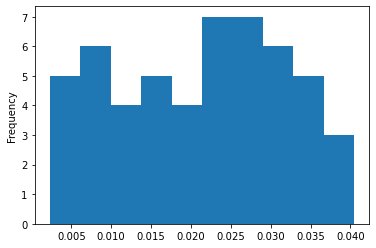

In [703]:
shops_68['ab_dist_lng'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

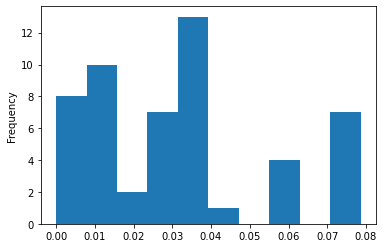

In [704]:
shops_68['ab_dist_lat'].plot.hist()

In [705]:
shops_68 = shops_68.assign(likes = shops_68['likes.count'])


<AxesSubplot:ylabel='Frequency'>

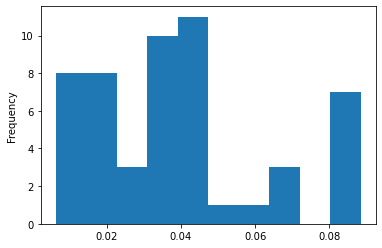

In [712]:
# Euclidean Distance. 
# shops_68['ab_dist_lat'] = shops_68['ab_dist_lat'].astype(float)
# shops_68['ab_dist_lng'] = shops_68['ab_dist_lng'].astype(float)
shops_68 = shops_68.assign(eucli_dist = (shops_68['ab_dist_lat']**2 + shops_68['ab_dist_lng']**2)**0.5)
shops_68['eucli_dist'].plot.hist()

In [707]:
# Test of Anova 
model = ols('likes ~ C(eucli_dist)', data=shops_68).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


sum_sq    df             F        PR(>F)
C(eucli_dist)  1.086405e+05  50.0  1.104971e+28  7.552544e-15
Residual       1.966396e-25   1.0           NaN           NaN